# Report: Analysis of Pizza Hut Reviews and Ratings in Colombo

The dataset "Pizza Hut Reviews and Ratings: Insights from One of Sri Lanka's Pioneer Branches" provides a comprehensive understanding of customer experiences at the Pizza Hut outlet located at Union Place, Colombo. With a total of 4000 entries, the dataset includes customer-provided ratings on a scale from 1 to 5, along with textual reviews detailing their experiences. The data presents opportunities for various data science applications, including sentiment analysis, trend identification, and quantifying customer satisfaction metrics.

Upon initial analysis, it is evident that the distribution of ratings is skewed towards higher scores, with a significant portion of customers providing ratings of 4 and 5. This suggests a generally positive perception of the Pizza Hut outlet among customers. However, further investigation into the textual reviews reveals both positive and negative sentiments, indicating a diverse range of experiences among customers. Word cloud analysis showcases frequently mentioned keywords in reviews, providing insights into popular aspects of the dining experience.

Additionally, the dataset allows for the exploration of trends over time, such as changes in average rating or the number of reviews. Analysis of average ratings by day of the week may reveal patterns in customer satisfaction based on the day of visit. Furthermore, sentiment analysis enables the identification of shifts in overall customer sentiment over time, allowing Pizza Hut to address potential areas for improvement proactively. Overall, the data offers valuable insights into customer perceptions and behaviors, which can inform strategic decision-making and enhance the overall dining experience at Pizza Hut Union Place, Colombo.

In conclusion, the analysis of Pizza Hut reviews and ratings provides valuable insights into customer satisfaction and preferences at the Union Place outlet in Colombo. While the majority of customers express positive sentiments, the dataset highlights areas for potential improvement based on negative feedback. By leveraging data science techniques such as sentiment analysis and trend identification, Pizza Hut can better understand customer needs and preferences, leading to targeted improvements in service quality and customer satisfaction. Ultimately, this data-driven approach can contribute to the continued success and growth of Pizza Hut in Sri Lanka's competitive dining market.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("/kaggle/input/pizza-hut-ratings-and-reviews/pizza_hut_reviews.csv")

In [5]:
df.head()

,title,stars,text
0,Pizza Hut - Union Place,5,NaN
1,Pizza Hut - Union Place,5,NaN
2,Pizza Hut - Union Place,4,NaN
3,Pizza Hut - Union Place,5,NaN
4,Pizza Hut - Union Place,4,NaN


In [6]:
df.describe()

,stars
count,4000.000000
mean,4.371500
std,0.985003
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


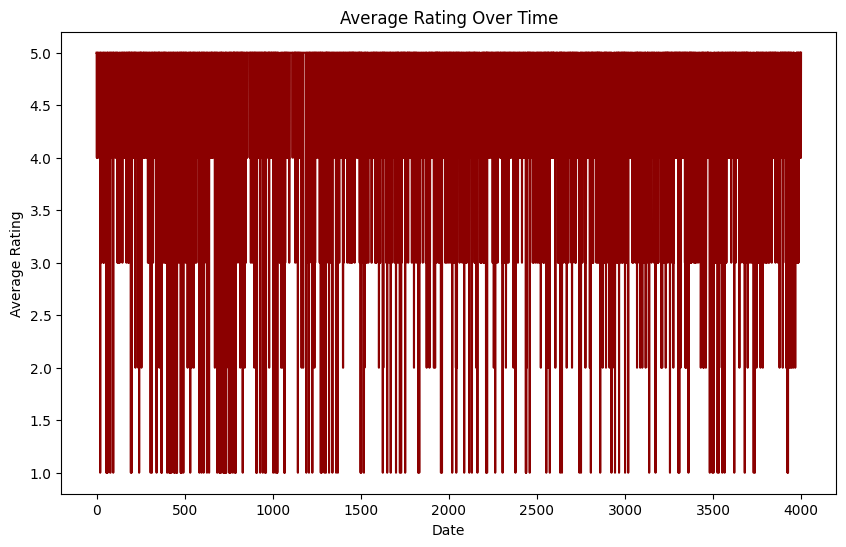

In [8]:
plt.figure(figsize=(10,6))
df.groupby(df.index)['stars'].mean().plot(color='darkred')
plt.title('Average Rating Over Time')
plt.xlabel('Date')
plt.ylabel('Average Rating')
plt.show()

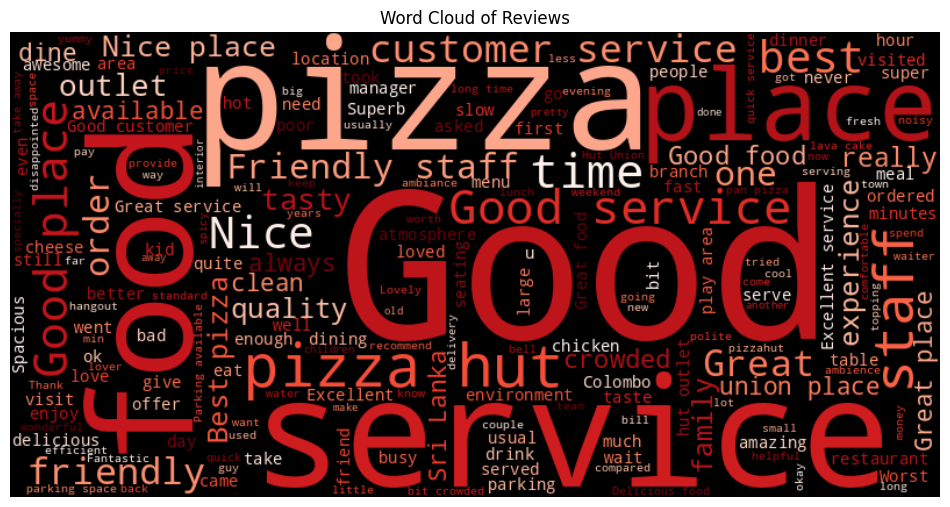

In [9]:
from wordcloud import WordCloud

text = ' '.join(df['text'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(text)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()

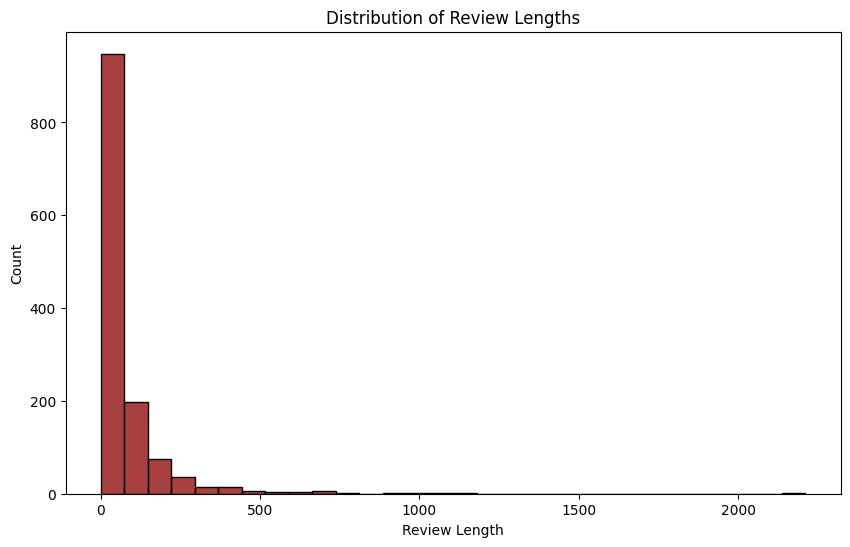

In [10]:
plt.figure(figsize=(10,6))
df['text_length'] = df['text'].dropna().apply(len)
sns.histplot(df['text_length'], color='darkred', bins=30)
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Count')
plt.show()

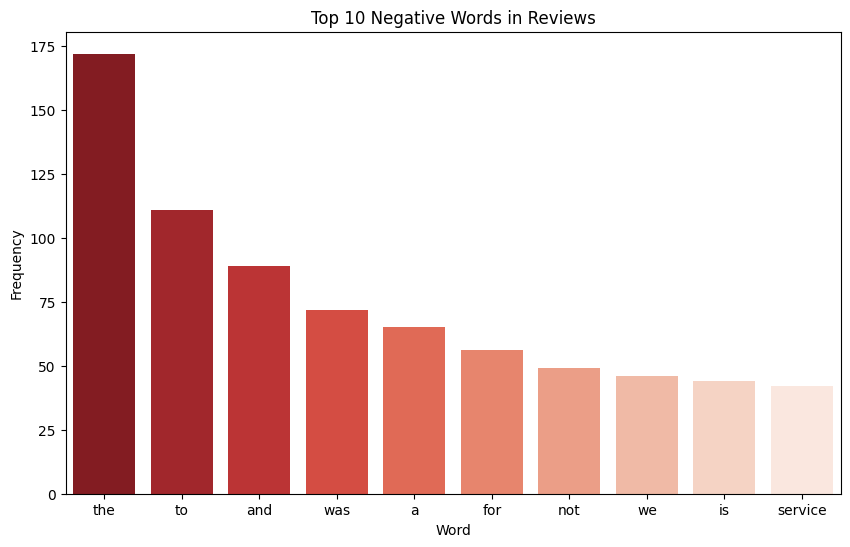

In [14]:
negative_words = Counter(" ".join(df[df['stars'] < 3]['text'].dropna()).split()).most_common(10)
negative_words_df = pd.DataFrame(negative_words, columns=['Word', 'Frequency'])

plt.figure(figsize=(10,6))
sns.barplot(x='Word', y='Frequency', data=negative_words_df, palette='Reds_r')
plt.title('Top 10 Negative Words in Reviews')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.show()

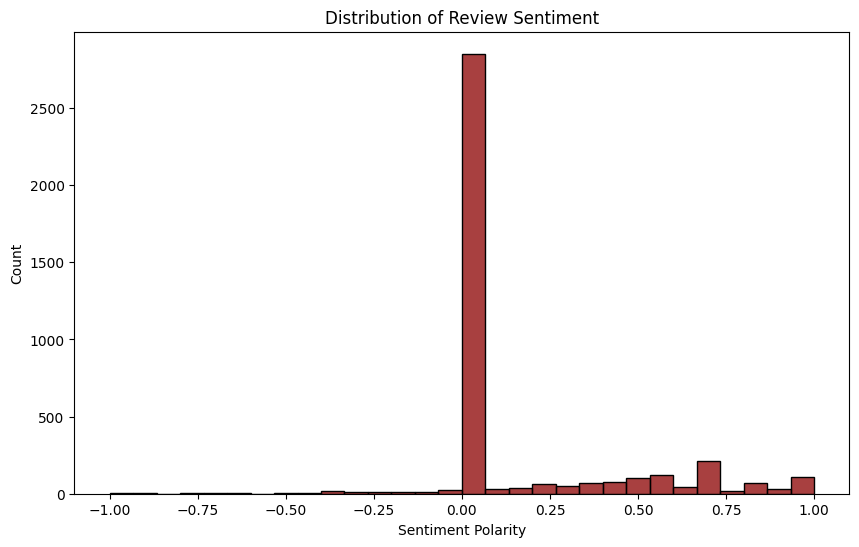

In [15]:
from textblob import TextBlob

def get_sentiment(text):
    analysis = TextBlob(str(text))
    return analysis.sentiment.polarity

df['sentiment'] = df['text'].apply(get_sentiment)

plt.figure(figsize=(10,6))
sns.histplot(df['sentiment'], color='darkred', bins=30)
plt.title('Distribution of Review Sentiment')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Count')
plt.show()

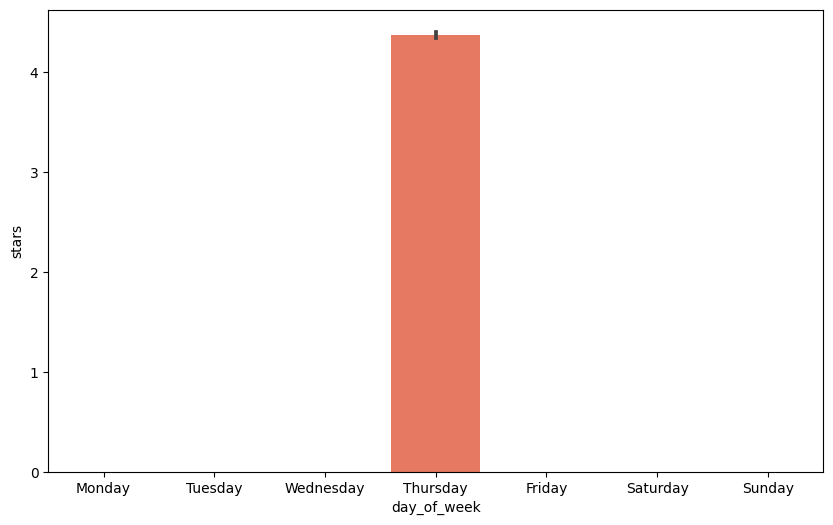

In [18]:
df.index = pd.to_datetime(df.index)

# Now you can use day_name()
df['day_of_week'] = df.index.day_name()

plt.figure(figsize=(10,6))
sns.barplot(x='day_of_week', y='stars', data=df, order=calendar.day_name, palette='Reds_r')
plt.show()